## Load and Check Data

In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import pickle
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import io

In [3]:
book = pd.read_csv(r'Data\Books.csv')
ratings = pd.read_csv(r'Data\Ratings.csv')
users = pd.read_csv(r'Data\Users.csv')

## Book Data

In [4]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [12]:
ratings.sort_values(by=['User-ID'],ascending=True)

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9562,7,034542252,0
9572,8,0771025661,0
9580,8,1881320189,7
9579,8,1575663937,6
...,...,...,...
9560,278854,0553579606,8
9554,278854,0375703063,7
9553,278854,0316184152,7
9555,278854,042516098X,7


In [6]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [13]:
data = pd.merge(ratings,users,on='User-ID')
data = pd.merge(data,book,on='ISBN')
data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,"fort lee, new jersey, usa",NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,"wakeman, ohio, usa",43.0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,"cedar park, texas, usa",NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


I think each data got the missing value because the row of shape is different

In [15]:
print("Books Shape: " ,book.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [17]:
print("Any null values in Books:\n" ,book.isnull().sum())
print("Any null values in Ratings:\n ",ratings.isnull().sum())
print("Any null values in Users:\n",users.isnull().sum())

Any null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Any null values in Ratings:
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Any null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


# Preprocessing

In [19]:
books_data = book.merge(ratings, on = 'ISBN')
books_data 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [22]:
books_data[books_data['Book-Title']=='Clara Callan'][['Book-Title','Book-Author','Year-Of-Publication','Image-URL-L']]

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-L
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
2,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
3,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
4,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
5,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
6,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
7,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
8,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
9,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
10,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...


In [24]:
df = books_data.copy()
# Delete the null value
df.dropna(inplace=True)
# Reset the index after delete the missing value (loss the index and got index like before)
df.reset_index(drop=True, inplace=True)
df.drop(columns=['ISBN', 'Year-Of-Publication','Image-URL-S','Image-URL-M'],axis=1, inplace=True)
df.drop(index=df[df['Book-Rating']==0].index, inplace=True)
df['Book-Title'] = df['Book-Title'].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9


# Popularity Based Recommendation System
- Popularity based recommendation system are based on the `rating of item by all the users`
- Popularity based recommendation *works with the trend*. It basicly `uses the items which are in trend right now`.

In [33]:
def popular_books(df,n=100):
    rating_count = df.groupby('Book-Title')['Book-Rating'].count().reset_index()
    rating_count.rename(columns={'Book-Rating':'NumberOfVotes'},inplace=True)

    rating_average = df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
    rating_average.rename(columns={'Book-Rating':'AverageRating'},inplace=True)

    popularBooks = rating_count.merge(rating_average, on='Book-Title')

    def weighted_rate(x):
        v = x['NumberOfVotes']
        R = x['AverageRating']
        return ((v*R) + (m+C))/(v+m)

    C = popularBooks['AverageRating'].mean()
    m = popularBooks['NumberOfVotes'].quantile()

    popularBooks = popularBooks[popularBooks['NumberOfVotes'] >=250]
    popularBooks['Popularity'] = popularBooks.apply(weighted_rate, axis=1)
    popularBooks = popularBooks.sort_values('Popularity', ascending=False)
    return popularBooks[['Book-Title','NumberOfVotes','AverageRating','Popularity']].head(n)

In [45]:
df['Image-URL-L'].to_csv('image_url.csv',index=False)

In [46]:
df['Image-URL-L']

1          http://images.amazon.com/images/P/0002005018.0...
3          http://images.amazon.com/images/P/0002005018.0...
5          http://images.amazon.com/images/P/0002005018.0...
8          http://images.amazon.com/images/P/0002005018.0...
9          http://images.amazon.com/images/P/0002005018.0...
                                 ...                        
1031115    http://images.amazon.com/images/P/0395264707.0...
1031120    http://images.amazon.com/images/P/1845170423.0...
1031122    http://images.amazon.com/images/P/0449906736.0...
1031123    http://images.amazon.com/images/P/0440400988.0...
1031124    http://images.amazon.com/images/P/0525447644.0...
Name: Image-URL-L, Length: 383837, dtype: object

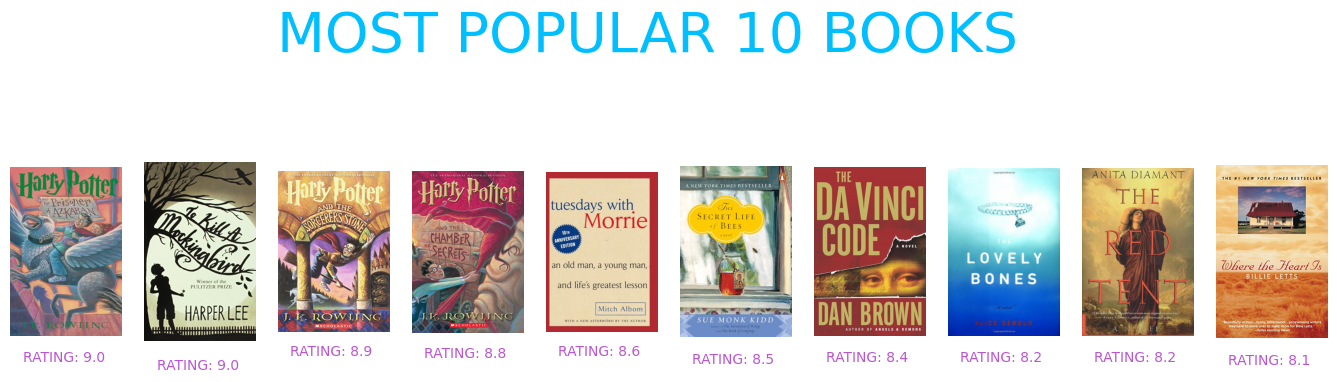

In [63]:
n=10
top_ten=pd.DataFrame(popular_books(df,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("MOST POPULAR 10 BOOKS",fontsize=40,color="deepskyblue")
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
for i in range(len(top_ten["Book-Title"].tolist())):
    url=df.loc[df["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    img=Image.open(requests.get(url,headers=headers,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(df[df["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

URL: http://images.amazon.com/images/P/0439136350.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0446310786.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0385484518.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
Content Type: image/jpeg
URL: http://images.amazon.com/images/P/0151008116.01.LZZZZZZZ.jpg
Content Type: image/jpeg

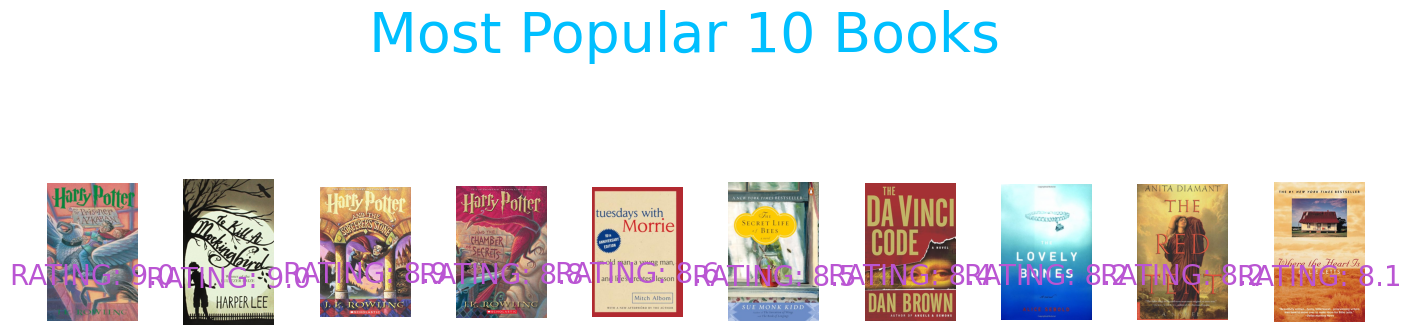

In [61]:
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import io

n = 10
top_ten = pd.DataFrame(popular_books(df))
fig, ax = plt.subplots(1, n, figsize=(17, 5))
fig.suptitle('Most Popular 10 Books', fontsize=40, color='deepskyblue')
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
for i in range(len(top_ten['Book-Title'].to_list())):
    url = df.loc[df['Book-Title'] == top_ten['Book-Title'].tolist()[i], "Image-URL-L"][:1].values[0]
    print("URL:", url)
    
    try:
        response = requests.get(url, headers=headers, stream=True)
        content_type = response.headers['Content-Type']
        print("Content Type:", content_type)

        if response.status_code == 200 and 'image' in content_type:
            img = Image.open(response.raw)
            ax[i].imshow(img)
            ax[i].axis('off')
            ax[i].set_title("RATING: {}".format(round(df[df['Book-Title'] == top_ten['Book-Title'].tolist()[i]]['Book-Rating'].mean(), 1)),
                            y=0.20, color='mediumorchid', fontsize=20)
        else:
            print(f"Failed to retrieve image from URL: {url}. Status Code: {response.status_code}, Content Type: {content_type}")
    except (UnidentifiedImageError, Exception) as e:
        print(f"Error processing image from URL: {url}. Details: {e}")

plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots
plt.show()


In [58]:
url="http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg"
url = requests.get(url,stream=True)
img = Image.open(io.BytesIO(url.content))
img

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000191D033AAC0>

In [56]:
Image.__version__

'10.1.0'

In [38]:
for i in range(len(top_ten['Book-Title'].to_list())):
    print(round(df[df["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1))

9.0
9.0
8.9
8.8
8.6
8.5
8.4
8.2
8.2
8.1
8.1
8.0
8.0
7.9
7.9
7.8
7.8
7.7
7.6
7.5
7.5
7.5
7.4
7.4
7.3
6.9
4.4
